# Práctica 1 - Self-Organising Maps - COLORES
## Preparación de entorno
#### Importar librerías de código

In [136]:
# from __future__ import division

import numpy as np
from matplotlib import pyplot as plt
from matplotlib import patches as patches
import math

%matplotlib inline

#### Dataset que se va a utilizar para el entrenamiento

In [137]:
# Código para obtener el Dataset que se va a usar en el entrenamiento
valor_max = 256
valor_min = 0
valores_color = 3
num_colores = 100
datos = np.random.randint(valor_min, valor_max, (valores_color, num_colores))

## SOM Setup
#### Variables definidas por el alumno

In [138]:
# Inicializa tamaño del mapa de Kohonen, número de iteraciones y learning rate
# Inicializa normalizar_datos dependiendo de si tienes que normalizar los datos o no
lado_mapa = 7
periodo = 300
learning_rate = 0.1
normalizar_datos = True

#### A partir de este punto solo hay cálculos. No se introducen más valores "a mano"

In [139]:
# Establece el numero de entradas del mapa y el número de datos que se van a usar para entrenar. 
# Utiliza una función que obtenga automáticamente los valores a partir del Dataset.
num_entradas = valores_color
num_datos = num_colores

# Calcula el vecindario inicial. Debe ser la mitad del lado del mapa de Kohonen
vecindario = int(lado_mapa/2)

# Normaliza los datos si fuese necesario dividiendo cada dato por el máximo en la matriz
if normalizar_datos:
    #datos = preprocessing.normalize(datos)
    datos = datos / 255
# Crea una matriz de pesos con valores random entre 0 y 1. Usa la función random.random de la librería NumPy
matriz_pesos = np.random.random((lado_mapa,lado_mapa,valores_color))

#### Funciones para entrenar/clasificar

In [140]:
# Función para encontrar la BMU
"""
   Encuentra la BMU para un patrón de entrada.
   Entradas: (patrón_de_entrada, matriz_de_pesos, número_de_entradas)
   Salidas:  (bmu, bmu_idx) tupla donde
               bmu: vector de pesos de la neurona ganadora
               bum_idx: coordenadas de la neurona ganadora
"""
def calcular_bmu(patron_entrada, m_pesos, m):
   rows = len(m_pesos)
   columns = len(m_pesos[0])
   vectorPesos =  []
   ganadora = 2000
   for x in range(rows):
      for y in range(columns):
         for z in range(m):
            vectorPesos.append(m_pesos[x][y][z])
         dist = np.linalg.norm(np.array(vectorPesos - patron_entrada))
         if dist < ganadora:
            ganadora = dist
            Bmu = vectorPesos
            BmuIndex = np.stack((x,y))
         vectorPesos = []
   return Bmu , BmuIndex

In [141]:
# Función para calcular el descenso del coeficiente de aprendizaje (eta)
"""
   Calcula el Learning Rate (eta) que corresponde a la i-ésima presentación.
   Entradas: (learning_rate_inicial, iteracion, período)
   Salidas:  learning_rate para la iteración i

"""
def variacion_learning_rate(lr_inicial, i, n_iteraciones):
   learning_rate = lr_inicial * (1 - i/n_iteraciones)
   return learning_rate


In [142]:
# Función para calcular el descenso del vecindario (v)
"""
   Calcula el vecindario  (v) que corresponde a la i-ésima presentación.
   Entradas: (vecindario_inicial, iteracion, período)
   Salidas:  lvecindario para la iteración i

"""
def variacion_vecindario(vecindario_inicial, i, n_iteraciones):
   vecindario = 1 + vecindario_inicial * (1 - i/n_iteraciones)
   return vecindario
   

In [143]:
# Función para calcular el descenso del coeficiente de aprendizaje (eta) en función de la distancia a la BMU
"""
   Calcula la amortiguación de eta en función de la distancia en el mapa entre una neurona y la BMU.
   Entradas: (distancia_BMU, vecindario_actual)
   Salidas:  amortiguación para la iteración

"""
def decay(distancia_BMU, vecindario_actual):
    return np.exp(-distancia_BMU**2 / (2*vecindario_actual**2))

In [169]:
#Funcion Ajuste de matriz de pesos
def ajustarPesos(IndexN ):#, color , learning_rate , matriz_pesos):
    #Cambiamos el peso de la neurona dada por el BMU
    '''matriz_pesos[IndexN[0]][IndexN[1]] = matriz_pesos[IndexN[0]][IndexN[1]] + (learning_rate * (color - matriz_pesos[IndexN[0]][IndexN[1]]))'''
    #ajustamos las neuronas adyacentes usando decay()
    for i in range(vecindario): #probablemente que esto sea variacion_vecindario en cuyo caso habria que añadir un parametro iteracion a la funcion ajustarPesos()
        veci = i + 1 # variable vecindario
        print("vecindario: ",veci)
        izq = False
        der = False 
        arr = False 
        abj = False
        #izquiera (-1, 0)
        if (IndexN[0]-veci) >= 0: # el indice menos el numero de neuronas adyacente debe ser mayor que 0
            izq = True # se puede avanzar hacia la izquierda
        #derecha (1,0)
        if (IndexN[0]+veci) < lado_mapa: 
            der = True 
        #arriba (0,1)
        if (IndexN[1]+veci) < lado_mapa: 
            arr = True 
        #abajo (0,-1)
        if (IndexN[1]-veci) >= 0: 
            abj = True 
        # el bucle se ejecuta 2 veces la longitud del vecindario mas 1 (el bmu) si izquierda y derecha son true, es decir, no se sale de la matriz
        # los if son: si uno de los dos booleanos son true escribimos 2xPosicionBMU+1 si no si alguno de los dos lo es escribimos 2xPosicionBMU y si ninguno lo es escribimos lo anterior -1 
        for j in range((2*veci) + 1 if izq and der else (2*veci) if izq or der else (2*veci - 1)): 
            indX = IndexN[0] - veci + j if izq else IndexN[0] - veci + j + 1 # posicion de la neurona BMU - valor del vecindario - elemento iterativo (se suma 1 si está en un límite)
            for k in range ((2*veci) + 1 if arr and abj else (2*veci) if arr or abj else (2*veci - 1)): # igual que el bucle superior ya que el objetivo es recorrer una matriz cuadrada
                indY = IndexN[1] - veci + k if abj else IndexN[1] - veci + k + 1
                print("(",indX,",",indY,")")
    #return matriz_pesos

elemento = []
elemento.append(np.random.randint(0,7))
elemento.append(np.random.randint(0,7))
print(elemento)
ajustarPesos(elemento)

[2, 6]
vecindario:  1
( 1 , 5 )
( 1 , 6 )
( 2 , 5 )
( 2 , 6 )
( 3 , 5 )
( 3 , 6 )
vecindario:  2
( 0 , 4 )
( 0 , 5 )
( 0 , 6 )
( 0 , 7 )
( 1 , 4 )
( 1 , 5 )
( 1 , 6 )
( 1 , 7 )
( 2 , 4 )
( 2 , 5 )
( 2 , 6 )
( 2 , 7 )
( 3 , 4 )
( 3 , 5 )
( 3 , 6 )
( 3 , 7 )
( 4 , 4 )
( 4 , 5 )
( 4 , 6 )
( 4 , 7 )
vecindario:  3
( 0 , 3 )
( 0 , 4 )
( 0 , 5 )
( 0 , 6 )
( 0 , 7 )
( 0 , 8 )
( 1 , 3 )
( 1 , 4 )
( 1 , 5 )
( 1 , 6 )
( 1 , 7 )
( 1 , 8 )
( 2 , 3 )
( 2 , 4 )
( 2 , 5 )
( 2 , 6 )
( 2 , 7 )
( 2 , 8 )
( 3 , 3 )
( 3 , 4 )
( 3 , 5 )
( 3 , 6 )
( 3 , 7 )
( 3 , 8 )
( 4 , 3 )
( 4 , 4 )
( 4 , 5 )
( 4 , 6 )
( 4 , 7 )
( 4 , 8 )
( 5 , 3 )
( 5 , 4 )
( 5 , 5 )
( 5 , 6 )
( 5 , 7 )
( 5 , 8 )


#### Funciones para dibujar la salida de la red

In [146]:
# Función para pintar una matriz de valores como colores RGB
def pintar_mapa(matriz_valores):
    fig = plt.figure()
    
    # Establece ejes
    ax = fig.add_subplot(111, aspect='equal')
    ax.set_xlim((0, matriz_pesos.shape[0]+1))
    ax.set_ylim((0, matriz_pesos.shape[1]+1))
    ax.set_title('Self-Organising Map después de %d iteraciones' % periodo)

    # Dibuja los rectángulos de color RGB
    for x in range(1, matriz_valores.shape[0] + 1):
        for y in range(1, matriz_valores.shape[1] + 1):
            ax.add_patch(patches.Rectangle((x-0.5, y-0.5), 1, 1,
                         facecolor=matriz_valores[x-1,y-1,:],
                         edgecolor='none'))
    plt.show()

## SOM Entrenamiento

2.718281828459045
2.718281828459045
2.718281828459045
2.718281828459045
2.718281828459045
2.718281828459045
2.718281828459045
2.718281828459045
2.718281828459045
2.718281828459045
2.718281828459045
2.718281828459045
2.718281828459045
2.718281828459045
2.718281828459045
2.718281828459045
2.718281828459045
2.718281828459045
2.718281828459045
2.718281828459045
2.718281828459045
2.718281828459045
2.718281828459045
2.718281828459045
2.718281828459045
2.718281828459045
2.718281828459045
2.718281828459045
2.718281828459045
2.718281828459045
2.718281828459045
2.718281828459045
2.718281828459045
2.718281828459045
2.718281828459045
2.718281828459045
2.718281828459045
2.718281828459045
2.718281828459045
2.718281828459045
2.718281828459045
2.718281828459045
2.718281828459045
2.718281828459045
2.718281828459045
2.718281828459045
2.718281828459045
2.718281828459045
2.718281828459045
2.718281828459045
2.718281828459045
2.718281828459045
2.718281828459045
2.718281828459045
2.718281828459045
2.71828182

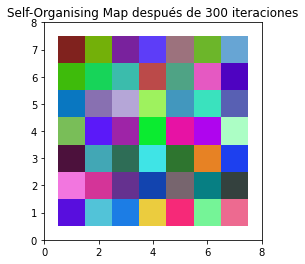

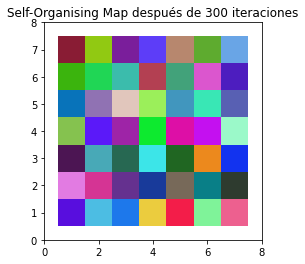

In [147]:
# Entrena la red con el dataset de entrenamiento
matriz_pesos_orig = matriz_pesos.copy()
datosT = np.transpose(datos)
listabmu = []
listabmu.append([-1,-1])
for x in range(periodo):
    if((x+1) % 100 == 0):
        print(x+1)
    numAleatorio = np.random.randint(0, num_colores)
    color = datosT[numAleatorio]
    Bmu , BmuIndex = calcular_bmu(color,matriz_pesos,valores_color)
    #creacion de la lista de indexes usados
    isNotInListIndex = True
    for index in listabmu:
        if index[0] == BmuIndex[0] and index[1] == BmuIndex[1]:
            isNotInListIndex = False
    if isNotInListIndex:
        listabmu.append(BmuIndex)
    #Algoritmo de aprendizaje:
    #print(matriz_pesos[BmuIndex[0]][BmuIndex[1]])
    matriz_pesos = ajustarPesos(BmuIndex , color , learning_rate , matriz_pesos).copy()
    #print(matriz_pesos[BmuIndex[0]][BmuIndex[1]])

#Muestro los indexes usados:
for bmuIndex in listabmu: 
    if bmuIndex[0] != -1 and bmuIndex[1] != -1:
        print(bmuIndex + 1, " <-traducido- [",bmuIndex[0],",",bmuIndex[1],"]")
#pinto mapa antiguo y nuevo para comparar
pintar_mapa(matriz_pesos_orig)
pintar_mapa(matriz_pesos)

## SOM Clasificación

In [148]:
# Clasifica los patrones de entrenamiento con la matriz de pesos recién entrenada



## SOM Prueba

In [149]:
# Clasifica nuevos patrones

